<a href="https://colab.research.google.com/github/Tom4c3/masters-thesis-GoogleColab/blob/main/%E3%80%90%E3%83%86%E3%83%B3%E3%83%97%E3%83%AC%E3%80%91%E3%83%9C%E3%83%BC%E3%83%AB%E8%BB%8C%E9%81%93%E3%81%A8%E4%BF%A1%E9%A0%BC%E6%A5%95%E5%86%86%E6%8F%8F%E7%94%BB%26%E6%B3%A8%E8%A6%96%E5%AF%BE%E8%B1%A1%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

【】

信頼楕円の傾きの求め方が間違っていたので修正したもの

2023/11/29 テンプレート最終更新
___

最初に配列でx,yの軌道データを指定

xはxの値そのままであるが，yは元データのzの値を用いることに注意（Unityが左手座標系であるため）

生データcsvからは https://tom4c3.github.io/simple-text-replacer/ などでPythonの配列形式に変換を行う
→自動でやるように処理を追加してもいいかも．でもそのままデータを貼るようにすると，縦長のデータがたくさん出てきてページが見にくくなるのでこのままが良さそう）

In [ ]:
x=[

    0,0.001087308,0.003137763,0.005707367,0.008771383,0.01119357,0.01418011,0.01691907,0.01688478,0.01520624,0.0113102,0.009797965,0.007836564,0.004592381,0.002932169,-0.001890252,-0.005436297,-0.006862164,-0.01043568,-0.0144379,-0.01898763,-0.02269833,-0.02678757,-0.02676021,-0.02614342,-0.0245465,-0.02313329,-0.02021732,-0.01745144,-0.01667899,-0.01576726,-0.01472169,-0.0140231,-0.01271585,-0.01018896,-0.007173003,-0.004182231,-0.00315029,-0.002176591,-0.00202628,-0.002320949,-0.002602135,-0.002732293,-0.002871008,-0.003415878,-0.00386741,-0.004336921,-0.005638461,-0.006473685,-0.006217482,-0.005898162,-0.005781077,-0.005138159,-0.004687669,-0.004337861,-0.003895221,-0.003598272,-0.004110392,-0.005908065,-0.008476723,-0.01130619,-0.01491982,-0.01507383,-0.01574524,-0.01651685,-0.01662857,-0.01671448,-0.01686993,-0.01687079,-0.01688564,-0.01688109,-0.01713177,-0.0175966,-0.01802642,-0.01819147,-0.01800676,-0.01781061,-0.01741532,-0.01722929,-0.01752573,-0.01844678,-0.01987801,-0.02148306,-0.02193294,-0.02332924,-0.02408161,-0.02620723,-0.02791318,-0.02858636,-0.03023336,-0.03171002,-0.03265446,-0.03284838,-0.03264919,-0.03263133,-0.03271974,-0.0330376,-0.03288266,-0.03243702,-0.03202249,-0.03176231,-0.03141394,-0.03128517,-0.03111939,-0.03112403,-0.03118802,-0.03116945,-0.03101839,-0.03061469,-0.02961979,-0.02744715,-0.02506523,-0.02183242,-0.02174526,-0.0218178,-0.02273781,-0.02389292,-0.02532438,-0.02709168,-0.02754743,-0.02891177,-0.03012219,-0.03012657,-0.03002417,-0.02978153,-0.02952536,-0.0296805,-0.03007581,-0.03008439,-0.03056905,-0.03131613,-0.0314729,-0.0318376,-0.03222337,-0.03309793,-0.03388906,-0.03482271,-0.03498448,-0.03524116,-0.03535048,-0.0360707,-0.03721276,-0.0384118,-0.03885688,-0.04022281,-0.04116073,-0.04149247,-0.04217067,-0.04345602,-0.044973,-0.04612262,-0.04597294,-0.0451203,-0.04404287,-0.0432282,-0.04269204,-0.04123159,-0.04054537,-0.03889075,-0.03862311,-0.03803075,-0.03689475,-0.03639008,-0.03578323,-0.03449545,-0.0339427,-0.03266889,-0.03129882,-0.02940069,-0.02713196,-0.02656729,-0.02497008,-0.02244475,-0.01750106,-0.01207756,-0.007656526,-0.003251302,-0.0005024596,0.002149377,0.003274401,0.003367869,0.002854032,0.001297105,-0.0009177357,-0.003354392,-0.00571974,-0.009038616,-0.01155477,-0.01382981,-0.01609891,-0.01798482,-0.02058597,-0.02275822,-0.02493208,-0.02716885,-0.02793981,-0.02709027,-0.02422482,-0.02113758,-0.01803588,-0.01491595,-0.01382122,-0.01419778,-0.01699377,-0.01821149,-0.02031246,-0.0237364,-0.0247025,-0.02642237,-0.02981899,-0.03047985,-0.03217611,-0.03407267,-0.0349617,-0.037034,-0.03952354,-0.04016876,-0.04090532,-0.04162939,-0.04389069,-0.04676435,-0.04755174,-0.04817357,-0.04916153,-0.05036105,-0.05145848,-0.05260279,-0.05466011,-0.05499394,-0.05557621,-0.05623756,-0.05636904,-0.05664916,-0.0567401,-0.05665658,-0.05650758,-0.05640314,-0.05591601,-0.0549963,-0.053874

]


y=[

    0,0,8.46982E-05,0.0003534555,0.000695169,0.0008952618,0.0006884336,0.0006643534,0.0009010434,0.001231492,0.001452088,0.001299441,0.001069963,0.00074929,0.0005049109,-0.0004823208,-0.001677573,-0.003100753,-0.007669151,-0.01331109,-0.01993173,-0.02551651,-0.03180635,-0.03260195,-0.0337584,-0.0348413,-0.03499883,-0.03517061,-0.03509146,-0.03492546,-0.0347876,-0.03462404,-0.03441954,-0.03404689,-0.0332706,-0.03224963,-0.03129846,-0.03124434,-0.03155178,-0.03274131,-0.03459388,-0.03663981,-0.03717309,-0.0376904,-0.0390498,-0.04007959,-0.04061824,-0.04191363,-0.04257429,-0.04244775,-0.04235172,-0.04217666,-0.04182816,-0.04166007,-0.04145122,-0.04102498,-0.04054844,-0.04072624,-0.04135549,-0.04196084,-0.04241943,-0.04299295,-0.04298162,-0.04293013,-0.04294026,-0.04307818,-0.04340154,-0.04381925,-0.04401213,-0.04436171,-0.0449571,-0.04502672,-0.04542446,-0.04601586,-0.04658723,-0.0476706,-0.04822612,-0.04881406,-0.04965508,-0.05008316,-0.05050582,-0.05058193,-0.05044889,-0.05033112,-0.04994059,-0.04971647,-0.04908693,-0.04858148,-0.04841244,-0.0480476,-0.04783767,-0.04801512,-0.04868084,-0.04925227,-0.04952407,-0.04990542,-0.05040222,-0.05067331,-0.05115223,-0.0517413,-0.05228305,-0.05326742,-0.05391222,-0.05462325,-0.05558413,-0.05599785,-0.05635983,-0.05714065,-0.05753016,-0.05837893,-0.06017315,-0.06212163,-0.06485325,-0.0650847,-0.06552601,-0.06559026,-0.06528533,-0.06492591,-0.06448936,-0.0643779,-0.06411672,-0.06393796,-0.06410903,-0.0644908,-0.0650568,-0.06569958,-0.06638408,-0.06652015,-0.06653571,-0.06657046,-0.06646132,-0.0664885,-0.0666824,-0.06687611,-0.06707299,-0.06716436,-0.06730461,-0.06730682,-0.06726599,-0.06724823,-0.06716448,-0.06698406,-0.06680548,-0.06672931,-0.06646585,-0.06632155,-0.0662722,-0.06613374,-0.065889,-0.06566447,-0.06569338,-0.06585199,-0.06659001,-0.0674544,-0.06810629,-0.06864399,-0.06998163,-0.07051253,-0.07178509,-0.07200569,-0.07247806,-0.07338089,-0.07381678,-0.07436413,-0.07547259,-0.07593626,-0.07710242,-0.07841665,-0.08021611,-0.08215761,-0.08257622,-0.08375263,-0.08473355,-0.08555532,-0.08553547,-0.08481574,-0.08312678,-0.08148032,-0.07837331,-0.07500559,-0.07169133,-0.06800711,-0.06233644,-0.05623913,-0.04996592,-0.04441893,-0.03692865,-0.03054243,-0.0242911,-0.01736224,-0.0121358,-0.005908847,-0.0006451607,0.004576564,0.01054525,0.0144608,0.01974612,0.02403432,0.02678418,0.02940738,0.03214693,0.03327388,0.03352511,0.03245819,0.03167462,0.03011566,0.02744991,0.02651751,0.02471375,0.02200198,0.02132243,0.01914716,0.01650351,0.01550925,0.01319665,0.01064414,0.009557784,0.008053958,0.006505489,0.003890157,0.00132519,0.0003277063,-0.0007717609,-0.002915204,-0.006773055,-0.01170218,-0.01622021,-0.02166617,-0.02252918,-0.02472061,-0.02792174,-0.02892232,-0.0326013,-0.03647596,-0.03800958,-0.04155141,-0.04555446,-0.04724824,-0.05043018,-0.05468404

]

Original x: 240
Original y: 240
Arranged length of x: 240
Arranged length of y: 240
信頼楕円の面積は 0.00936598716246366


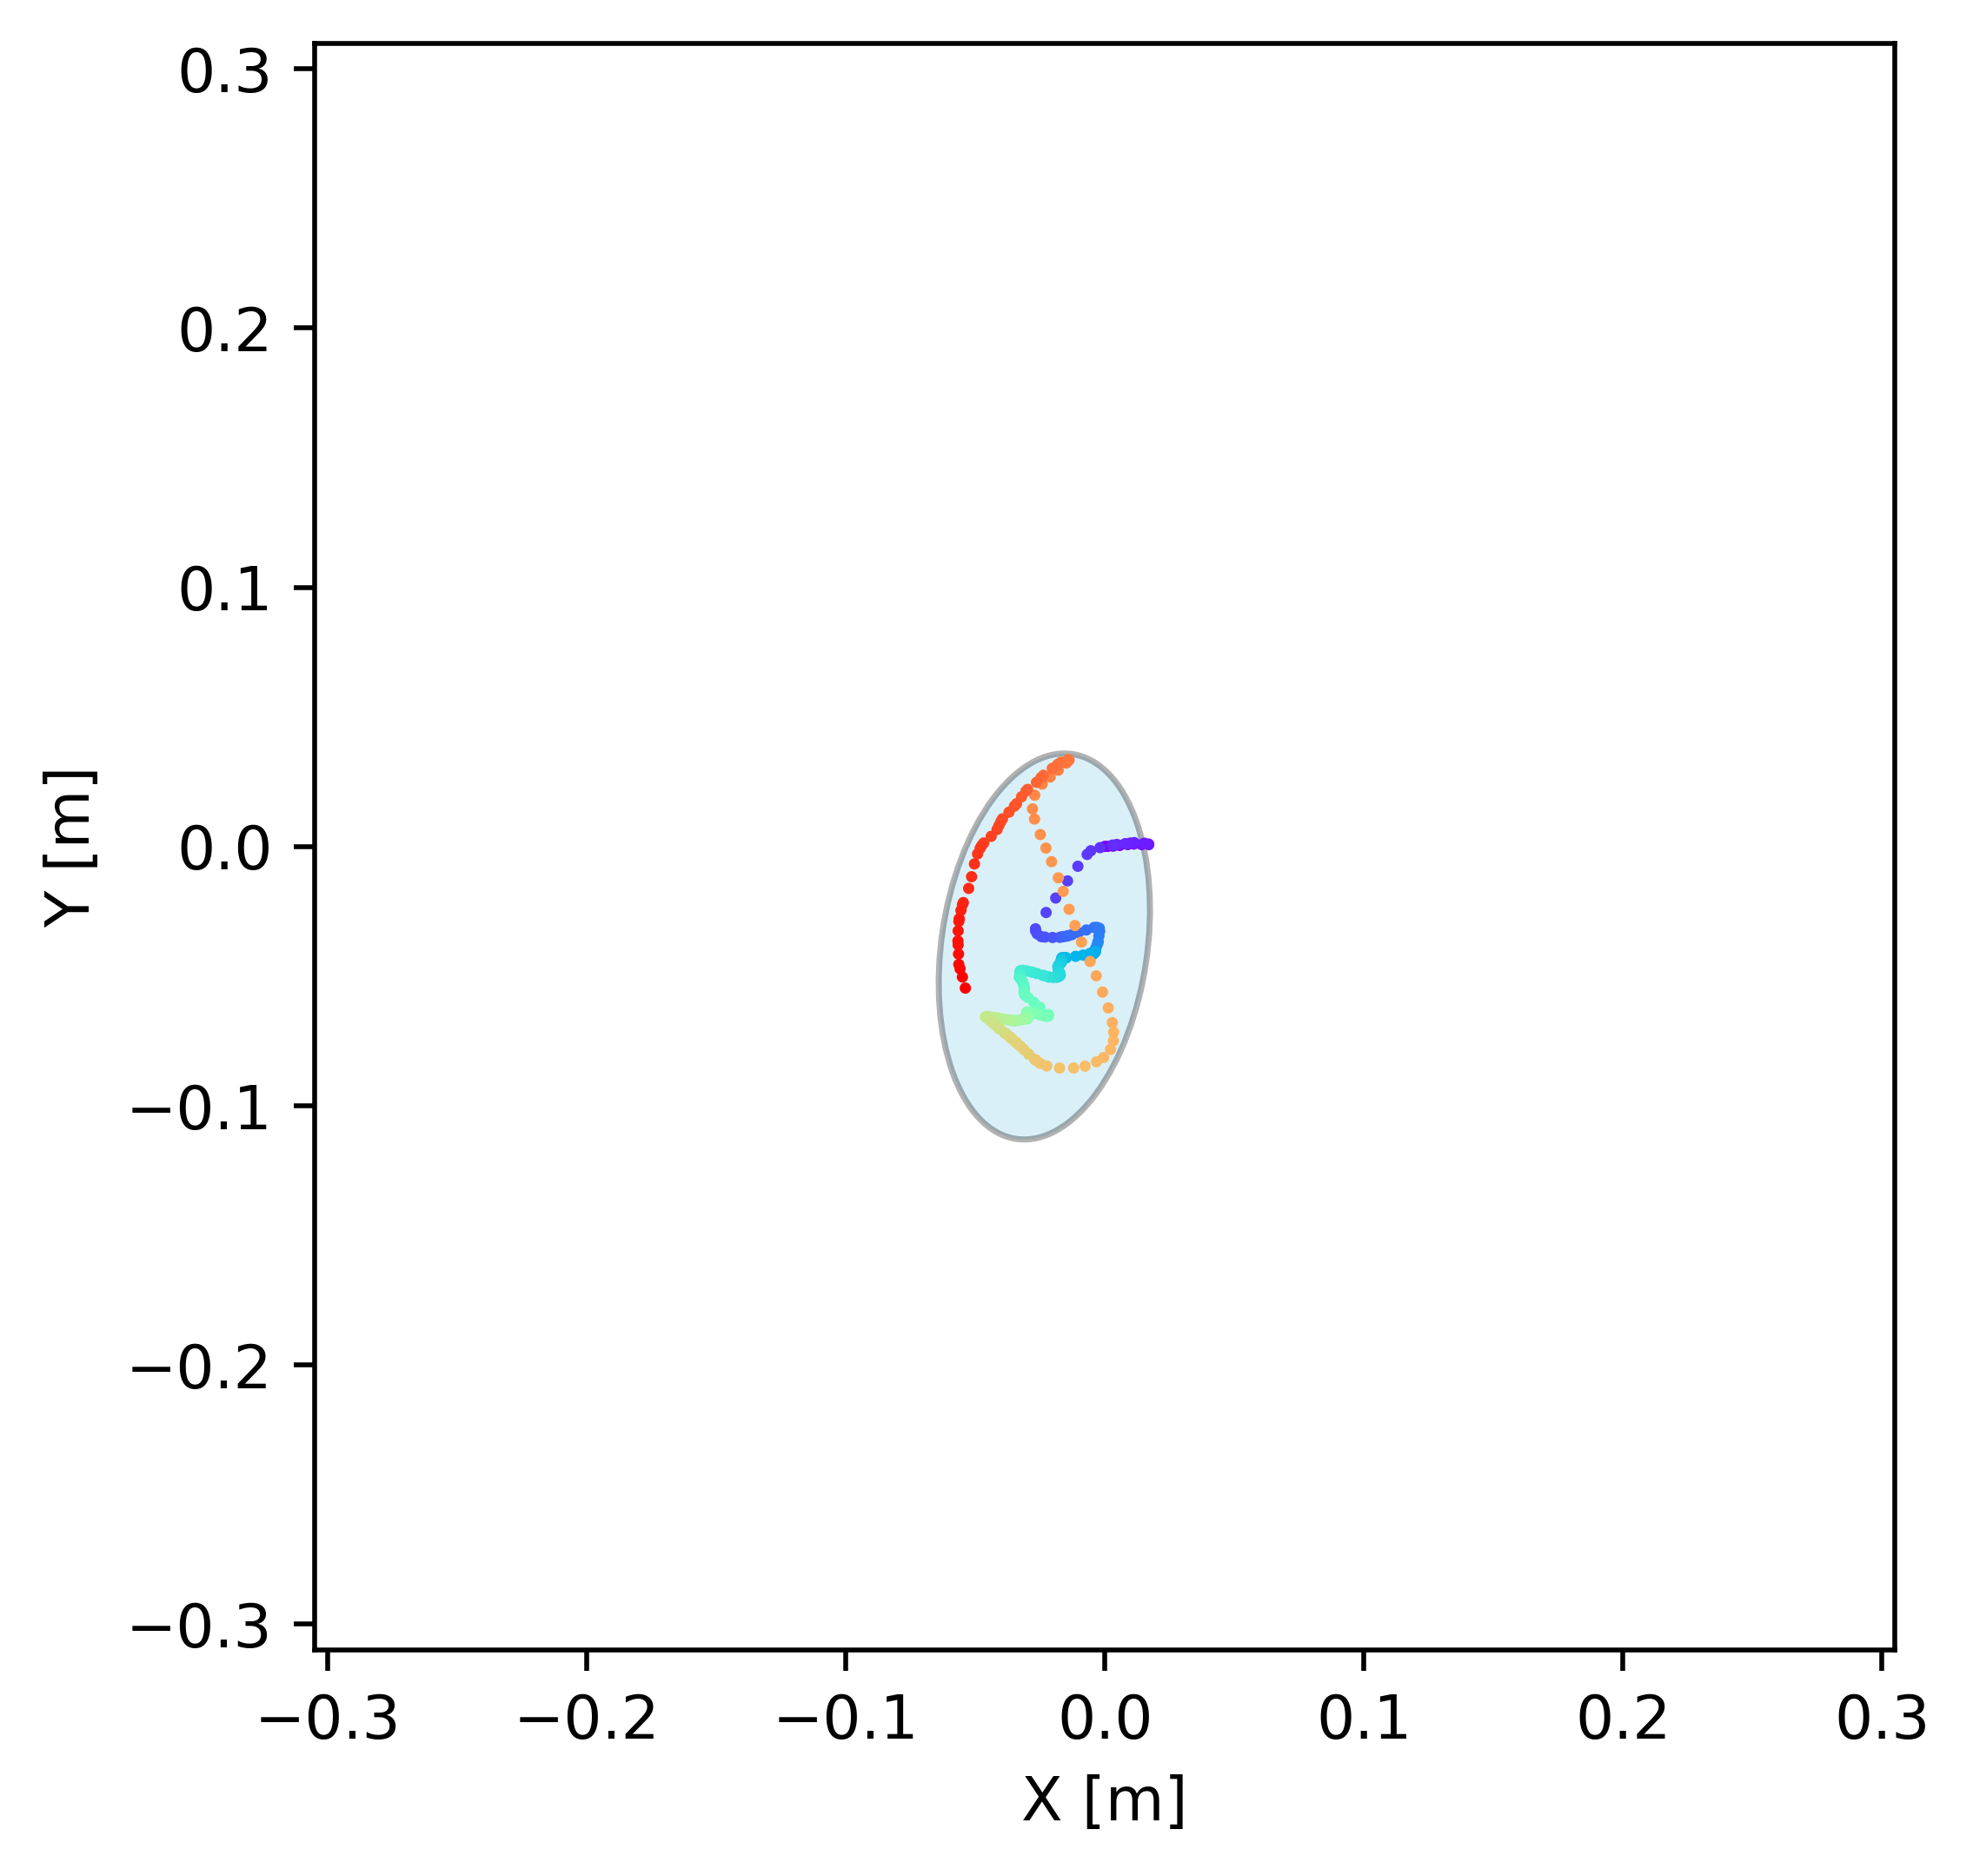

In [ ]:
# 配列x,yのボール軌道とその95%信頼楕円を計算して描画するプログラム
import numpy as np
import math

# 元データの要素数を出力
print("Original x:", len(x))
print("Original y:", len(y))

# x, yで要素数が小さいほうの配列の長さを求める
min_length = min(len(x), len(y))

# 両方のリストを短いほうの配列の長さに合わせて切り取る
x_shortened = x[0:min_length]
y_shortened = y[0:min_length]

# x, yのセットのnumpy配列に変換
array3 = np.array([x_shortened, y_shortened])
array4 = array3.T

# 結果の表示
print("Arranged length of x:", len(x_shortened))
print("Arranged length of y:", len(y_shortened))

# 信頼楕円の傾きの求め方を変更．最大固有ベクトルを使用（2023/11/27）
from scipy.stats import chi2
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.cm as cm

class ConfidenceEllipse:
    def __init__(self, data, p=0.95):
        self.data = data
        self.p = p

        self.means = np.mean(data, axis=0)
        self.cov = np.cov(data[:,0], data[:,1])

        lambdas, vecs = np.linalg.eigh(self.cov)
        order = lambdas.argsort()[::-1]
        lambdas, vecs = lambdas[order], vecs[:,order]

        c = np.sqrt(chi2.ppf(self.p, 2))
        self.w, self.h = 2 * c * np.sqrt(lambdas)

        vec = vecs[:,0]  # 最大固有ベクトル→楕円の傾き
        self.theta = np.degrees(np.arctan2(vec[1], vec[0]))

    def get_params(self):
        return self.means, self.w, self.h, self.theta

    def get_patch(self, line_color="black", face_color="none", alpha=0):
        el = Ellipse(xy=self.means,
                     width=self.w, height=self.h,
                     angle=self.theta, color=line_color, alpha=alpha)
        el.set_facecolor(face_color)
        return el

def gen_data():
    return array4

def main(show_legend=True, show_ellipse=True, path_color='rainbow'):
    data = gen_data()

    # 信頼楕円の面積を計算して表示
    el_obj = ConfidenceEllipse(data, p=0.95)
    print("信頼楕円の面積は " + str(el_obj.w/2 * el_obj.h/2 * math.pi))

    fig = plt.figure(dpi=500)
    ax = fig.add_subplot(1, 1, 1)

    num_points = len(data)

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-0.305, 0.305)
    ax.set_ylim(-0.31, 0.31)
    ax.set_xlabel("X [m]")
    ax.set_ylabel("Y [m]")

    # 信頼楕円の描画判定
    if show_ellipse:
        ax.add_artist(el_obj.get_patch(face_color="skyblue", alpha=0.3))

    # ボール軌道を描く（楕円の上から描画する）
    if path_color == 'rainbow':
        scatter = ax.scatter(data[:,0], data[:,1], c=range(num_points), cmap='rainbow', marker='.', s=3)
    else:
        scatter = ax.scatter(data[:,0], data[:,1], color='blue', marker='.', s=3)

    # 凡例の表示判定
    if show_legend and path_color == 'rainbow':
        sm = plt.cm.ScalarMappable(cmap=cm.rainbow, norm=plt.Normalize(vmin=0, vmax=num_points))
        sm.set_array([])
        cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
        cbar.set_label('Time [s]')

    plt.show()

if __name__ == "__main__":
    # 凡例，楕円を表示する場合はそれぞれTrue, 非表示の場合はFalse
    # path_colorの取る値はrainbowもしくはblue
    main(show_legend=False, show_ellipse=True, path_color='rainbow')


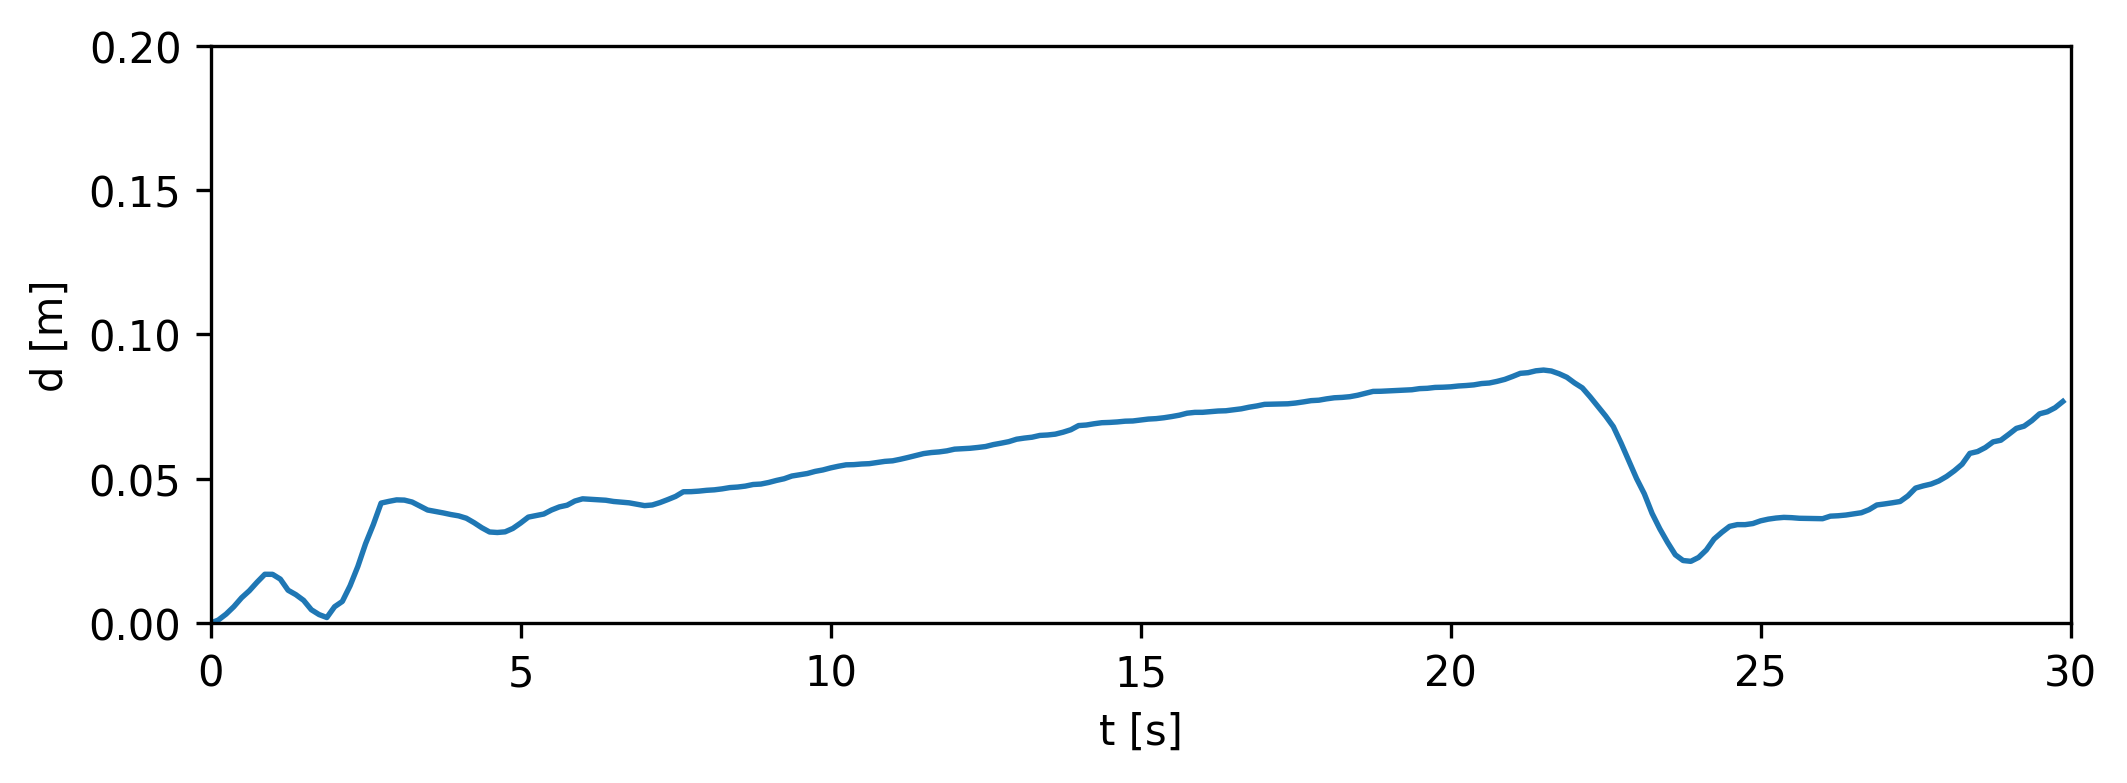

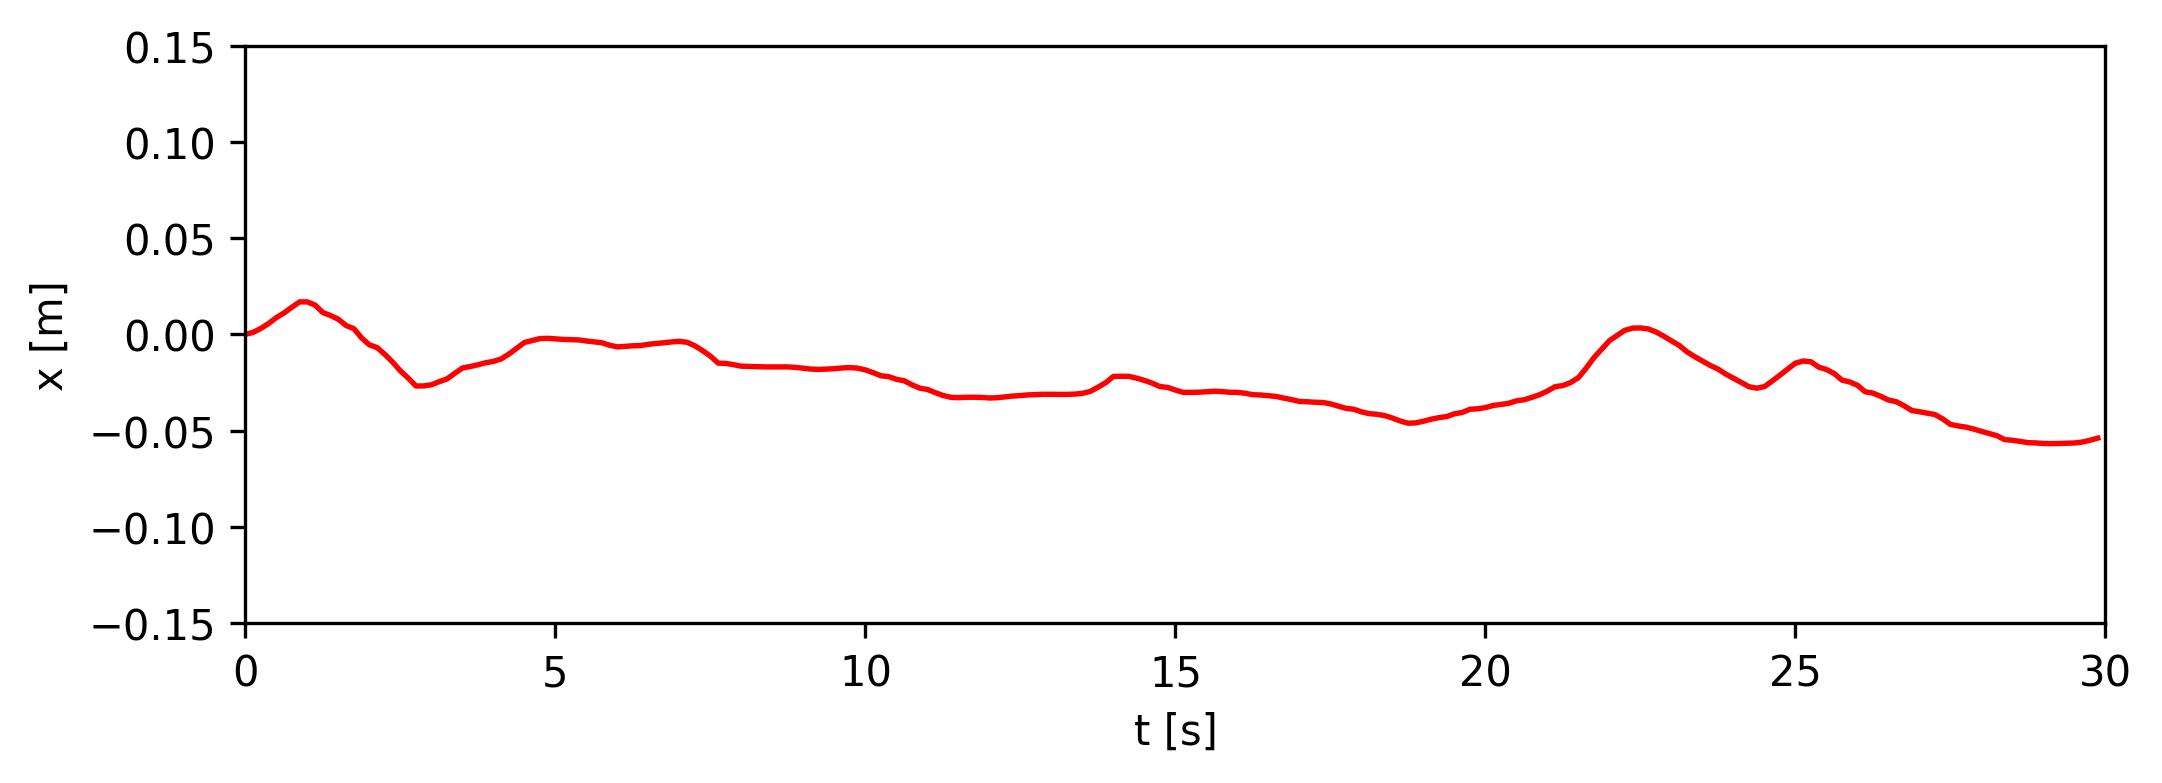

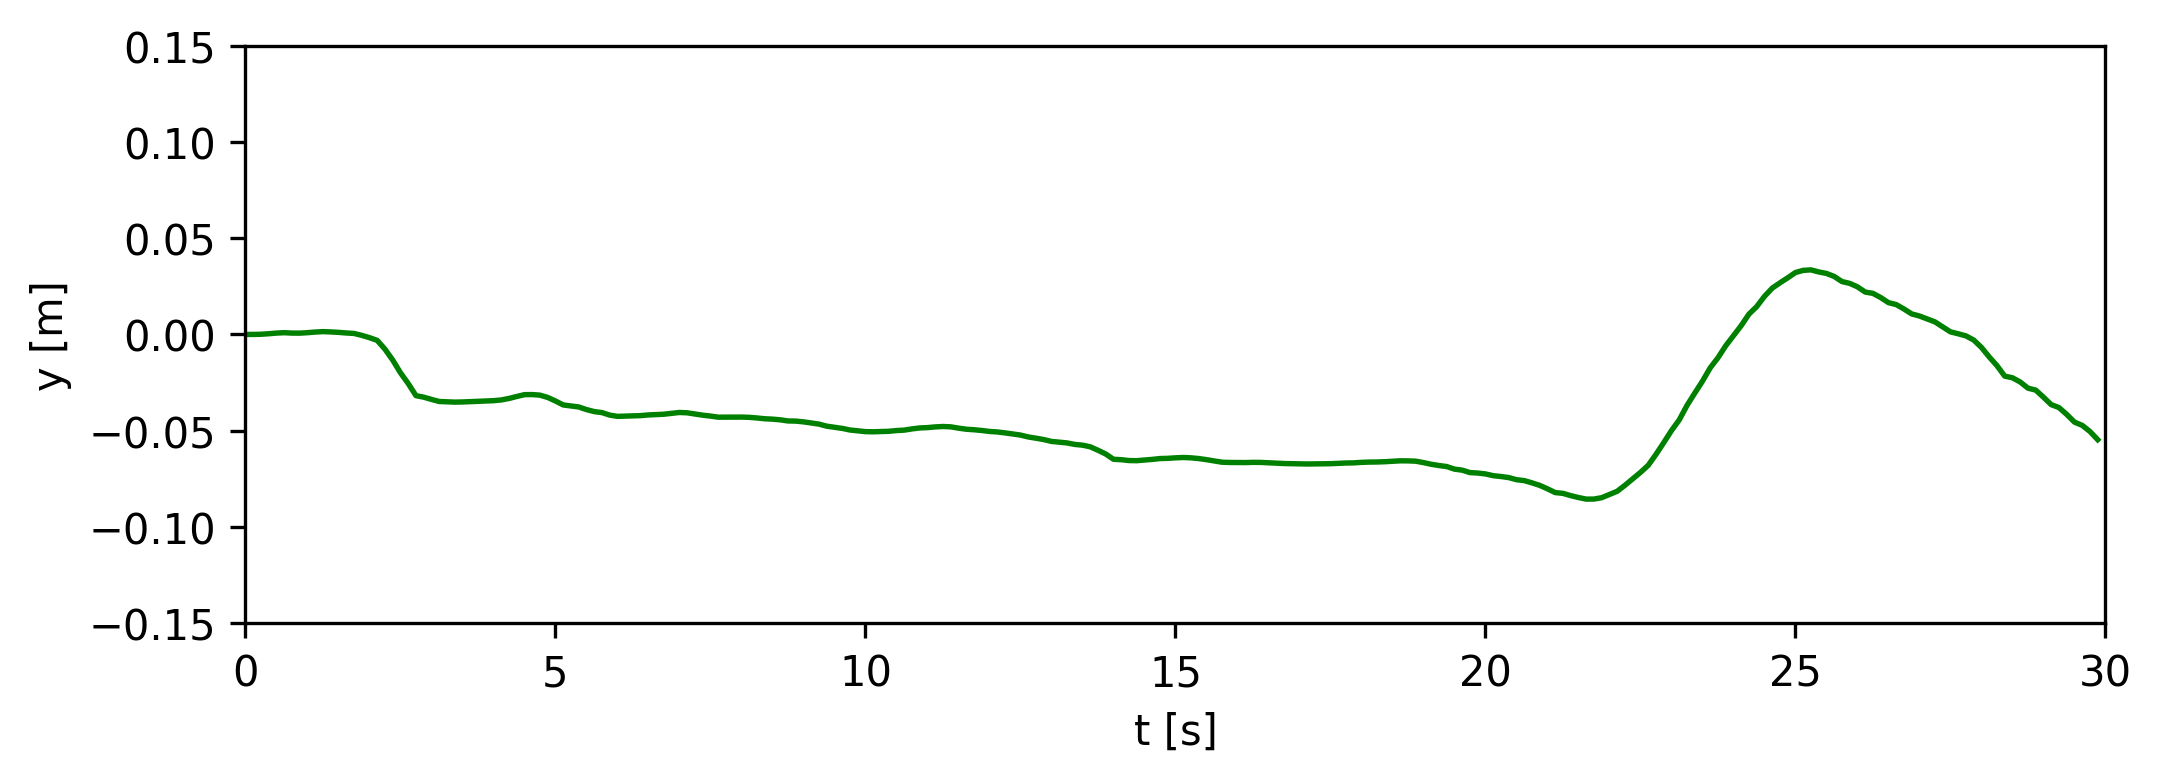

In [ ]:
# xとy少ないほうの要素数に合わせる（昔の名残，同一ファイルに保存してるから要素数に差は出ない）
min_length = min(len(x), len(y))

# 時間軸の作成 (30秒間でのデータポイント数に基づく)
time_interval = 30 / min_length
t = np.arange(0, 30, time_interval)

# 距離の計算
d = [math.sqrt(x[i]**2 + y[i]**2) for i in range(min_length)]

# 各グラフの(縦,横)の長さを調整
figsize = (8, 2.5)

# 距離 d のグラフをオレンジ色で作成
fig_d = plt.figure(figsize=figsize, dpi=300)
ax_d = fig_d.add_subplot(1, 1, 1)
ax_d.plot(t, d, color='#1f77b4', linewidth=1.3)
ax_d.set_xlim(0, 30)
ax_d.set_ylim(0, 0.2)
ax_d.set_xlabel("t [s]")
ax_d.set_ylabel("d [m]")
plt.show()

# x のグラフを赤色で作成
fig_x = plt.figure(figsize=figsize, dpi=300)
ax_x = fig_x.add_subplot(1, 1, 1)
ax_x.plot(t, x[:min_length], color='red', linewidth=1.3)
ax_x.set_xlim(0, 30)
ax_x.set_ylim(-0.15, 0.15)
ax_x.set_xlabel("t [s]")
ax_x.set_ylabel("x [m]")
plt.show()

# y のグラフを緑色で作成
fig_y = plt.figure(figsize=figsize, dpi=300)
ax_y = fig_y.add_subplot(1, 1, 1)
ax_y.plot(t, y[:min_length], color='green', linewidth=1.3)
ax_y.set_xlim(0, 30)
ax_y.set_ylim(-0.15, 0.15)
ax_y.set_xlabel("t [s]")
ax_y.set_ylabel("y [m]")
plt.show()


In [ ]:
import pandas as pd

# 与えられたデータ
data_str = """

PingPongBall
PingPongBall
PingPongBall
PingPongBall
PingPongBall
PingPongBall
PingPongBall
PingPongBall
PingPongBall
PingPongBall
Board_stop
Board_stop
Board_stop
Board_stop
PingPongBall
PingPongBall
PingPongBall
PingPongBall
PingPongBall
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
PingPongBall
PingPongBall
PingPongBall
PingPongBall
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
PingPongBall
Board_stop
Board_stop
wall_back
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
PingPongBall
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
PingPongBall
PingPongBall
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
PingPongBall
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
PingPongBall
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
wall_front
wall_front
wall_front
Board_stop
Board_stop
PingPongBall
PingPongBall
PingPongBall
Board_stop
Board_stop
Board_stop
Board_stop
PingPongBall
PingPongBall
PingPongBall
PingPongBall
PingPongBall
PingPongBall
PingPongBall
Board_stop
Board_stop
Board_stop
PingPongBall
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
PingPongBall
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
PingPongBall
PingPongBall
PingPongBall
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
wall_back
wall_back
Body
wall_back
Board_stop
PingPongBall
PingPongBall
PingPongBall
Board_stop
wall_back
wall_back
Body
wall_back
wall_back
PingPongBall
PingPongBall
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Body
Board_stop
Board_stop
Body
Board_stop
Body
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
Board_stop
wall_back


"""  # ここ↑に上記のデータ文字列を入れてください

# 文字列を行ごとに分割して、空行を取り除く
data = [line.strip() for line in data_str.split('\n') if line.strip()]

# pandas の Series を使ってデータの出現回数をカウント
series = pd.Series(data)
original_counts = series.value_counts()

# 割合を計算
original_percentages = original_counts / len(data) * 100

# 生データの割合を出力
print("生データの割合:")
for name, percentage in original_percentages.items():
    print(f"{name}: {percentage:.2f}%")

print("\n")  # セクションを分けるための改行

# データをカテゴリに分類
categories = []
for item in data:
    if item in ['Body', 'Face']:
        categories.append('アバター')
    elif item == 'PingPongBall':
        categories.append('ボール')
    elif 'wall' in item or 'Board' in item:
        categories.append('板')
    else:
        categories.append('その他')

# pandas の Series を使ってカテゴリの出現回数をカウント
category_series = pd.Series(categories)
category_counts = category_series.value_counts()

# 割合を計算
category_percentages = category_counts / len(categories) * 100

# 分類されたカテゴリの割合を出力
print("分類済みカテゴリの割合:")
order = ['板', 'ボール', 'アバター', 'その他']
for category in order:
    percentage = category_percentages.get(category, 0)
    print(f"{category}: {percentage:.2f}%")


生データの割合:
Board_stop: 74.38%
PingPongBall: 18.60%
wall_back: 3.72%
Body: 2.07%
wall_front: 1.24%


分類済みカテゴリの割合:
板: 79.34%
ボール: 18.60%
アバター: 2.07%
その他: 0.00%


___
↑ のコードブロックが長くなるからx,yみたいにあらかじめ変換して値を渡そうと思ったけど，文字列だから"Ball","wall",とかにしないといけないのがめんどくさそうだったので結局戻した．

参考：

https://chat.openai.com/share/bdbe762a-d40a-42f1-bb6b-fd831dc7175f
